In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 
import sklearn.linear_model as sklm
import sklearn.metrics as skm
import sklearn.ensemble as ske
import sklearn.neural_network as sknn
import sklearn.pipeline as skp
import sklearn.tree as skt
import sklearn.preprocessing as skpp
import matplotlib.pyplot as plt
from typing import List
from math import sqrt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

2024-03-26 12:58:53.113146: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 12:58:53.113208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 12:58:53.114698: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Reading Data**

In [2]:
# Reading Data
data = pd.read_csv("/kaggle/input/co2-emissions/CO2 Emissions.csv")

In [3]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [8]:
# Select only the categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print( " Column " , column , " has " ,  len(data[column].unique()) , " unique values " )


 Column  Make  has  42  unique values 
 Column  Model  has  2053  unique values 
 Column  Vehicle Class  has  16  unique values 
 Column  Transmission  has  27  unique values 
 Column  Fuel Type  has  5  unique values 


In [9]:
# Apply label encoding to each categorical column
for column in categorical_columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

print(data)

      Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0        0   1057              0             2.0          4            14   
1        0   1057              0             2.4          4            25   
2        0   1058              0             1.5          4            22   
3        0   1233             11             3.5          6            15   
4        0   1499             11             3.5          6            15   
...    ...    ...            ...             ...        ...           ...   
7380    41   1951             11             2.0          4            17   
7381    41   1957             11             2.0          4            17   
7382    41   1960             11             2.0          4            17   
7383    41   1968             12             2.0          4            17   
7384    41   1969             12             2.0          4            17   

      Fuel Type  Fuel Consumption City (L/100 km)  \
0             4       

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Make,7385.0,19.570210,11.311625,0.0,9.0,18.0,29.0,41.0
Model,7385.0,1023.658768,577.022369,0.0,531.0,999.0,1524.0,2052.0
Vehicle Class,7385.0,6.364523,4.822959,0.0,2.0,6.0,11.0,15.0
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Transmission,7385.0,14.027759,7.260507,0.0,6.0,15.0,17.0,26.0
Fuel Type,7385.0,3.262153,0.882482,0.0,3.0,3.0,4.0,4.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1


<Axes: >

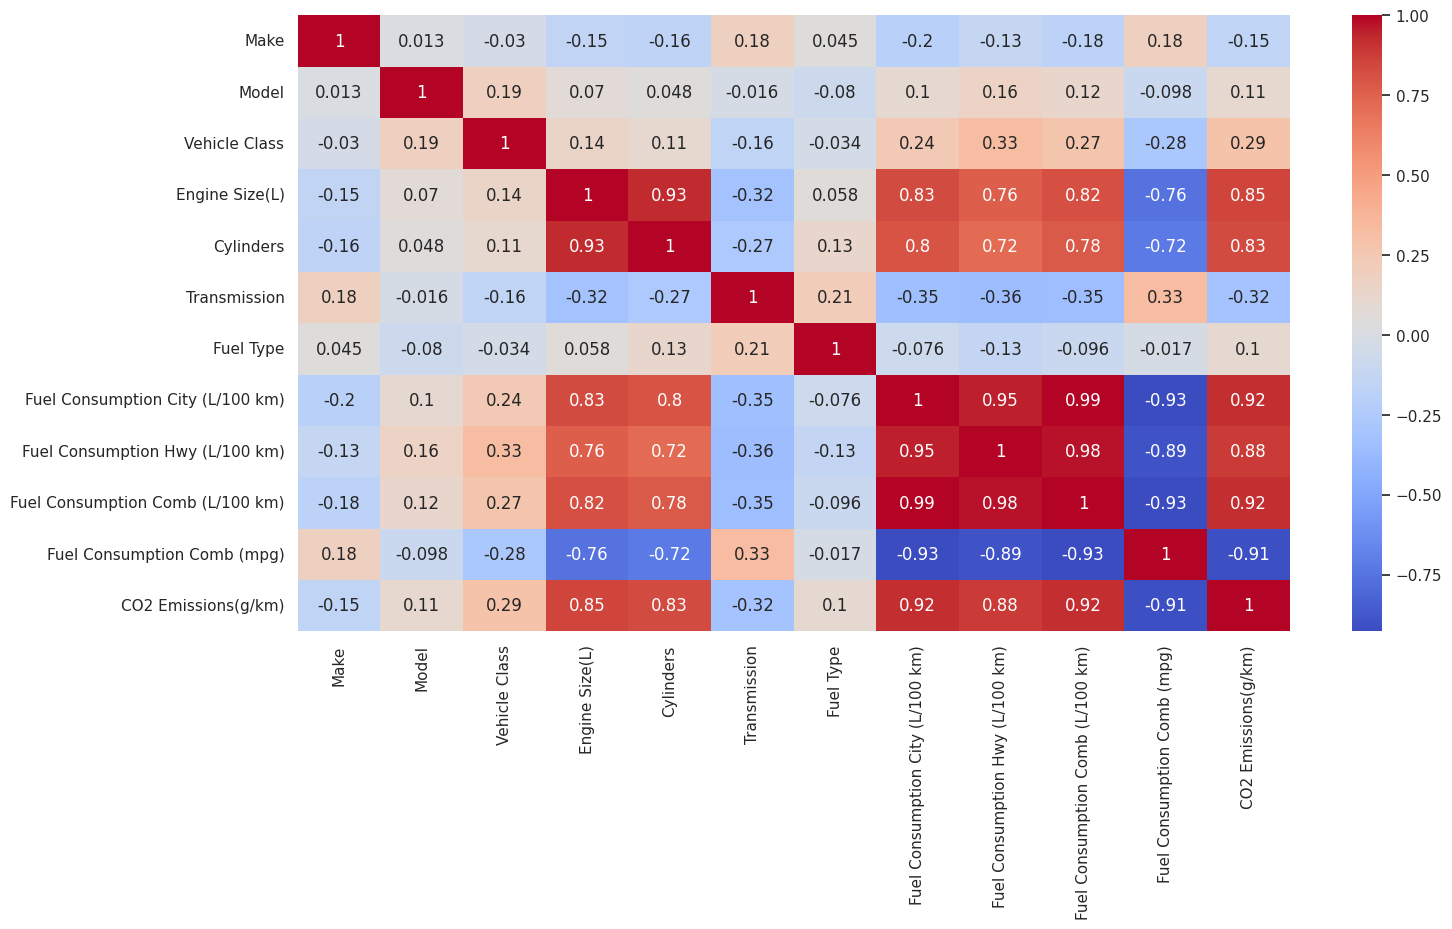

In [11]:
# plotting correlation heatmap
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [12]:
X = data.drop(["CO2 Emissions(g/km)"],axis=1)
y = data["CO2 Emissions(g/km)"]

In [13]:
#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20 )

# **Model Evaluations**

In [15]:
def model_metrics(target: pd.DataFrame, predictions: []) -> None:
    print("Explained variance regression score: %.3f" %skm.explained_variance_score(target, predictions))
    print("Maximum residual error: %.3f" %skm.max_error(target, predictions))
    
    print("Mean squared error: %.3f" %skm.mean_squared_error(target, predictions))
    print("R2 Score: %.3f" %skm.r2_score(target, predictions))
    print("Root-mean-square Error: %.3f" %sqrt(skm.mean_squared_error(target, predictions)))
    print("Median_absolute_error: %.3f" %skm.median_absolute_error(target , predictions))
    print("Mean_absolute_error: %.3f" %skm.mean_absolute_error(target , predictions))
    
    concat_data = pd.concat([target, pd.Series(predictions, index=target.index)], axis=1)
    concat_data.columns = ["actual", "predictions"]
    return concat_data.head()


In [16]:
sns.set_style('whitegrid')
# Set the style to whitegrid
plt.style.use('seaborn-whitegrid')
plt.style.library['seaborn-whitegrid']
plt.style.use("seaborn-v0_8-whitegrid")

from matplotlib import rcParams
rcParams['font.weight'] = 'bold'

def visulaize_graph(target , predictions , title = 'Model Name'):
    # Scatter plot
    plt.scatter(target, predictions, color='blue', alpha=0.5)  

    
    plt.plot([min(target), max(target)], [min(target), max(target)], color='red', linestyle='--')

   
    plt.xlabel('Actual Values', fontweight='bold')
    plt.ylabel('Predicted Values', fontweight='bold')
    plt.title(title +' Actual vs Predicted Values', fontweight='bold')

    plt.show()

    

/tmp/ipykernel_79/1079285320.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykernel_79/1079285320.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.library['seaborn-whitegrid']


**Lightgbm**

In [17]:
import lightgbm as lgb

gbm = lgb.LGBMRegressor()
gbm.fit(X_train, y_train)

#Calculating Details
print('GPM Train Score is : ' , gbm.score(X_train, y_train))
print('GPM Test Score is : ' , gbm.score(X_test, y_test))

#Calculating Prediction
gbm_y_pred = gbm.predict(X_test)
model_metrics(y_test , gbm_y_pred)

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 5908, number of used features: 11
[LightGBM] [Info] Start training from score 250.600372
GPM Train Score is :  0.9979021219558887
GPM Test Score is :  0.9969644806263149
Explained variance regression score: 0.997
Maximum residual error: 32.337
Mean squared error: 10.270
R2 Score: 0.997
Root-mean-square Error: 3.205
Median_absolute_error: 1.744
Mean_absolute_error: 2.196


,actual,predictions
2139,163,165.020471
7172,237,244.507561
4947,186,185.948492
5678,314,313.320365
6641,263,261.356570


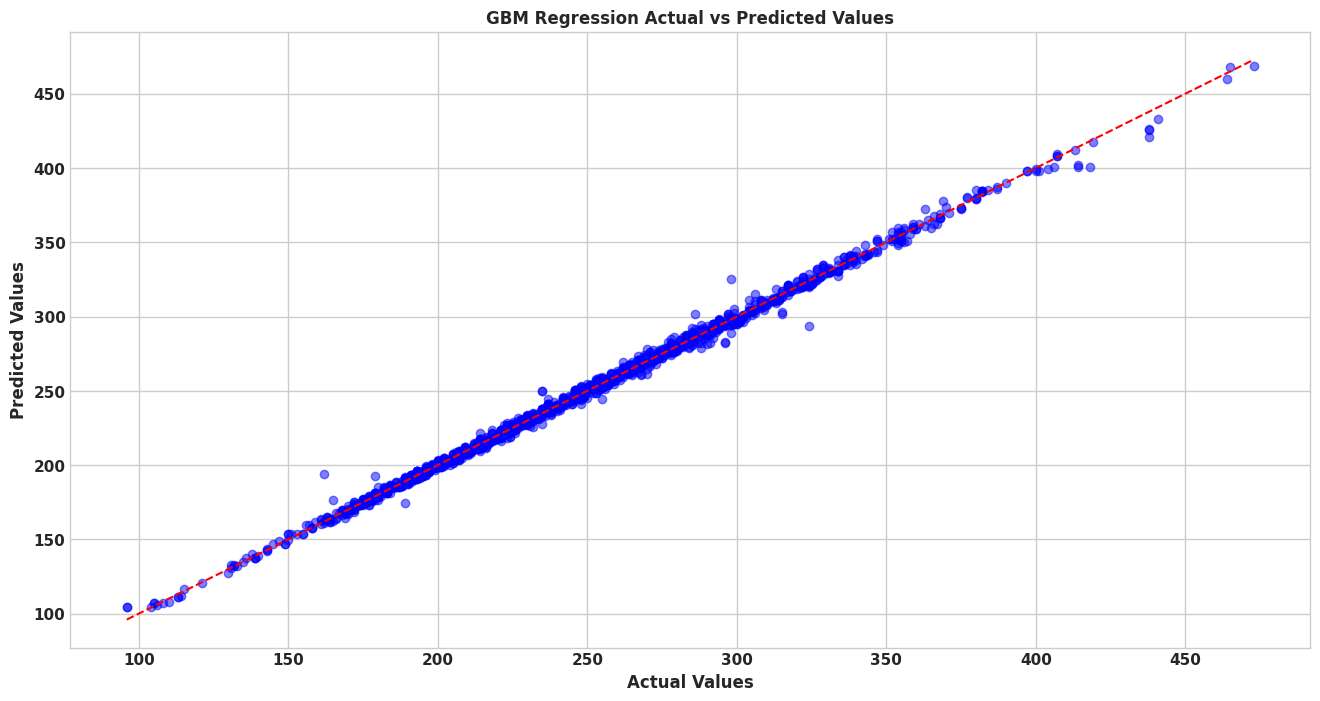

In [18]:
visulaize_graph(y_test, gbm_y_pred,"GBM Regression")

**SVR**

In [19]:
from sklearn.svm import SVR

# Create and train the SVR model
svr_model = SVR(kernel='rbf', C=80, gamma=1/(2*(0.1**2)))
svr_model.fit(X_train, y_train)


#Calculating Details
print('SVR Train Score is : ' , svr_model.score(X_train, y_train))
print('SVR Test Score is : ' , svr_model.score(X_test, y_test))

#Calculating Prediction
svr_y_pred = svr_model.predict(X_test)
model_metrics(y_test , svr_y_pred)

SVR Train Score is :  0.9744550683284011
SVR Test Score is :  0.7392427066947119
Explained variance regression score: 0.739
Maximum residual error: 225.689
Mean squared error: 882.212
R2 Score: 0.739
Root-mean-square Error: 29.702
Median_absolute_error: 3.895
Mean_absolute_error: 14.968


,actual,predictions
2139,163,165.184084
7172,237,237.100139
4947,186,186.099931
5678,314,312.972800
6641,263,262.899819


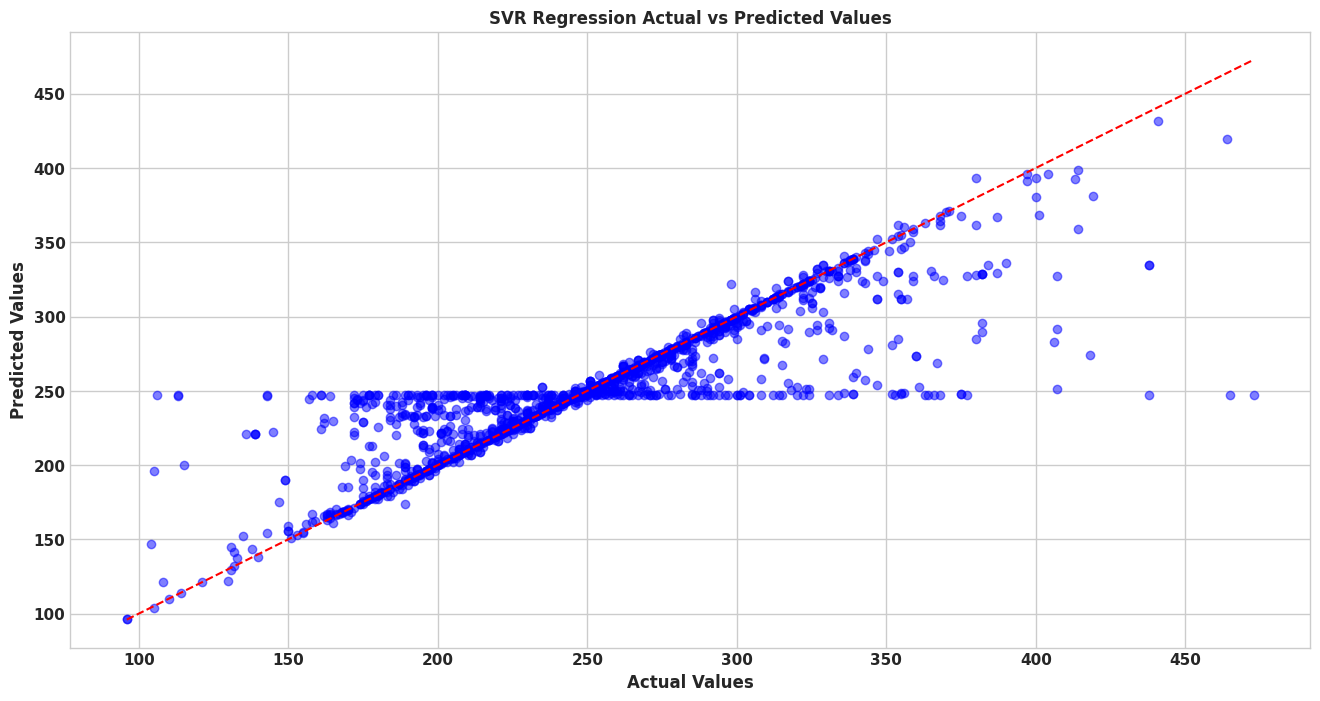

In [20]:
visulaize_graph(y_test, svr_y_pred,"SVR Regression")

**Linear Regression**

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

#Calculating Details
print('Linear Regression Train Score is : ' , lr.score(X_train, y_train))
print('Linear Regression Test Score is : ' , lr.score(X_test, y_test))

#Calculating Prediction
lr_y_pred = lr.predict(X_test)


Linear Regression Train Score is :  0.9158890697512119
Linear Regression Test Score is :  0.9160800058521803


In [22]:
model_metrics(y_test , lr_y_pred)

Explained variance regression score: 0.916
Maximum residual error: 83.512
Mean squared error: 283.924
R2 Score: 0.916
Root-mean-square Error: 16.850
Median_absolute_error: 6.661
Mean_absolute_error: 11.026


,actual,predictions
2139,163,165.981028
7172,237,258.169010
4947,186,140.804004
5678,314,312.731194
6641,263,264.297176


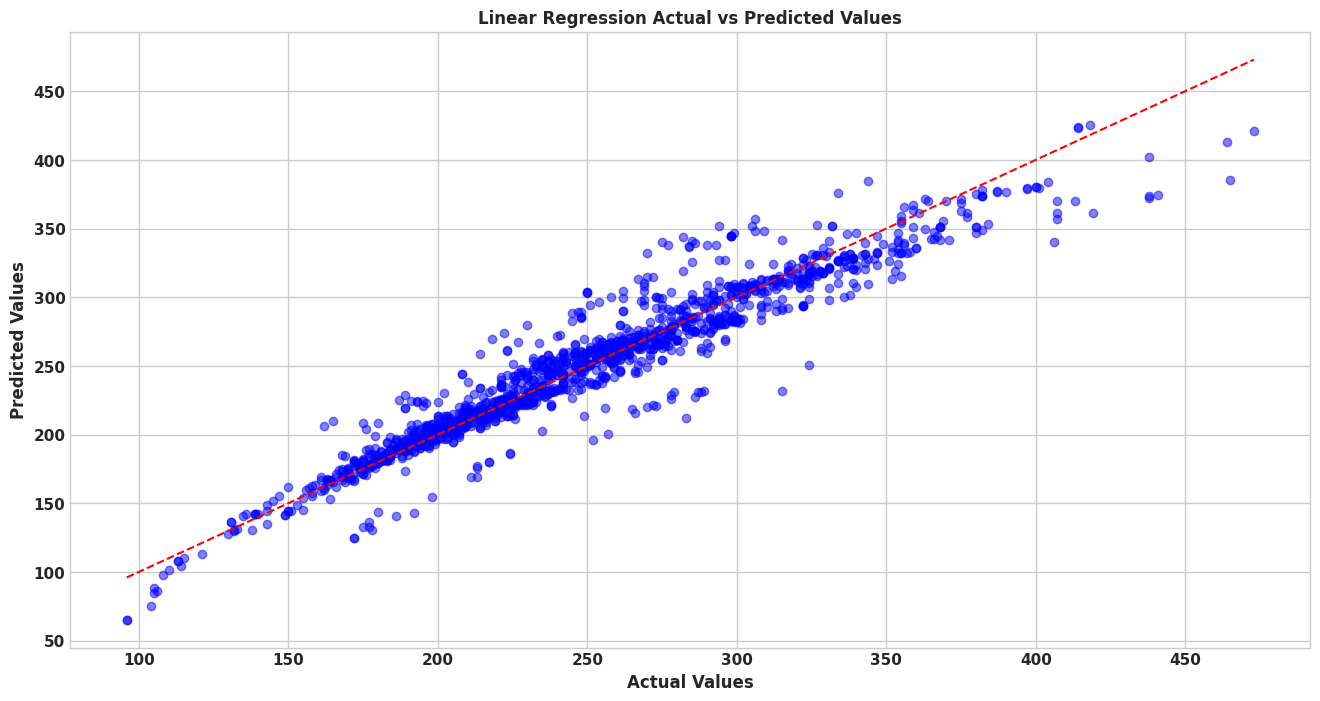

In [23]:
visulaize_graph(y_test, lr_y_pred,"Linear Regression")

**Random Forest**

In [24]:
#Import Libraries
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33)
rf.fit(X_train, y_train)

#Calculating Details
print('Random Forest Regressor Train Score is : ' , rf.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , rf.score(X_test, y_test))


#Calculating Prediction
rf_y_pred = rf.predict(X_test)


Random Forest Regressor Train Score is :  0.8210315789350972
Random Forest Regressor Test Score is :  0.8204224071014271


In [25]:
model_metrics(y_test , rf_y_pred)

Explained variance regression score: 0.820
Maximum residual error: 138.636
Mean squared error: 607.559
R2 Score: 0.820
Root-mean-square Error: 24.649
Median_absolute_error: 11.871
Mean_absolute_error: 16.558


,actual,predictions
2139,163,181.707955
7172,237,232.980906
4947,186,181.707955
5678,314,306.434506
6641,263,274.268719


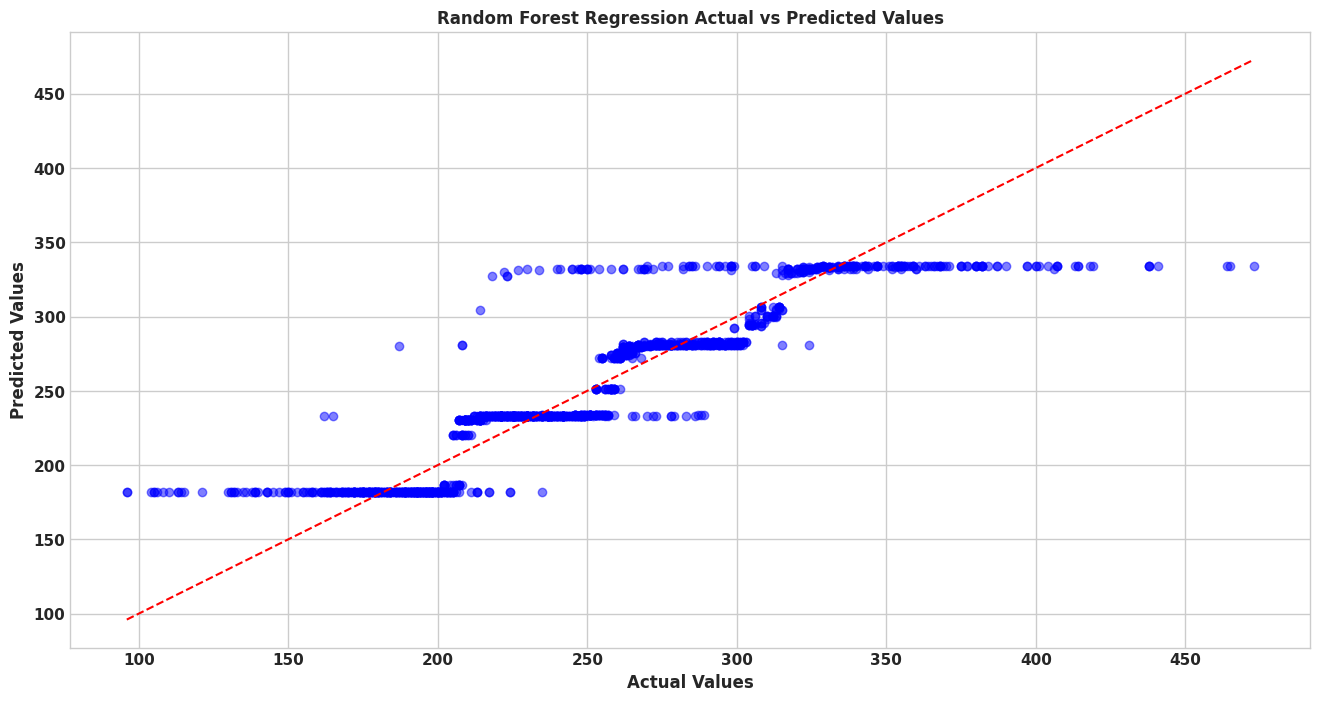

In [26]:
visulaize_graph(y_test, rf_y_pred,"Random Forest Regression")